#  AI vs Human Essay Classification

This project aims to build a binary classification model to detect whether an essay is written by a human or generated by AI. The dataset contains short essays labeled as either "AI" or "Human".

**Goal:** Predict the source of each essay (AI or Human) using machine learning.  
**Dataset Source:** Kaggle – AI Generated Essays Dataset  

Project structure:

1. Data Loading  
2. Exploratory Data Analysis (EDA)  
3. Data Preprocessing  
4. Feature Engineering  
5. Model Building & Evaluation  
6. Conclusion


In [119]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import textstat
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading the Dataset

We load the dataset containing short essays labeled as either "AI" or "Human".  
We will first explore the structure and basic information of the dataset before moving on to preprocessing.


In [101]:
# Load the dataset and display first five rows of data

df = pd.read_csv('/content/AI Generated Essays Dataset.csv')

df.head()

,text,generated
0,"Machine learning, a subset of artificial intel...",1
1,"A decision tree, a prominent machine learning ...",1
2,"Education, a cornerstone of societal progress,...",1
3,"Computers, the backbone of modern technology, ...",1
4,"Chess, a timeless game of strategy and intelle...",1


## EDA

In this section, we'll explore the dataset to understand its structure

In [102]:
# Check the shape of dataset

df.shape

(1460, 2)

In [103]:
# Check for missing values

df.isnull().sum()

,0
text,0
generated,0


In [104]:
# Data types

df.dtypes

,0
text,object
generated,int64


generated
0    1375
1      85
Name: count, dtype: int64


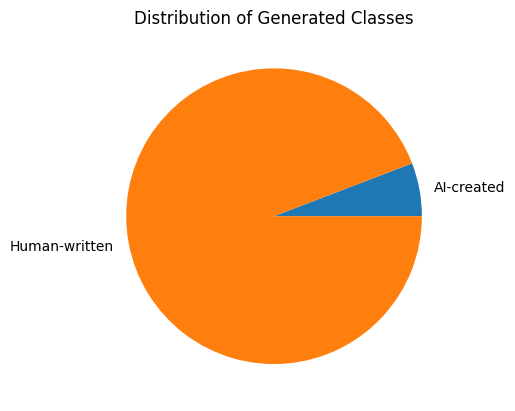

In [105]:
# Check classes distribution

class_count = df['generated'].value_counts()
print(class_count)

y = np.array([class_count[1], class_count[0]])
plt.pie(y, labels=['AI-created', 'Human-written'])
plt.title('Distribution of Generated Classes')
plt.show()

## Preprocessing

In this section, we will prepare the data for modeling

In [106]:
# Set of English stopwords

stop_words = set(stopwords.words('english'))

print(stop_words)

{'has', "we'll", 'did', 'haven', 'whom', "you've", "hadn't", 'myself', 'she', 'these', "you'll", 'yourself', 'y', "she's", 'very', 'and', 'aren', "aren't", 'such', 'just', 'hadn', 'yours', 'have', "couldn't", "won't", 'doing', "it's", 'won', 'which', 'between', 'your', 'don', 'having', 'themselves', 'out', 'most', 'again', "she'd", 'when', 'o', 'couldn', 'my', 'do', "should've", 'm', 'there', 'wouldn', 'for', 'his', 'if', "we'd", "i'll", 'during', 'not', "he'd", 'above', "it'll", "wasn't", 'i', 'weren', 'more', 'how', 'wasn', 'ourselves', "needn't", 'some', 'be', 'while', 'all', 'am', 'at', 'but', "didn't", 'then', 'should', "we've", 'had', 'nor', 'this', 'they', 'hasn', 'through', 'he', 'where', 'than', 'from', 'yourselves', 'ain', 'an', 'him', 'other', "they've", 'too', "doesn't", 'with', 'once', "he'll", 'its', 'on', 'shouldn', 'hers', 'why', 'before', "it'd", 'over', 'own', 're', 'herself', 'needn', "hasn't", 'the', 'in', 'against', 'to', 'will', "isn't", 'only', 'as', 'theirs', 'd

In [107]:
# Clean text function

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

In [108]:
# Copy original text column for future feature engineering

original_text = df['text'].copy()

In [109]:
# Apply function to the text column

for index, text in enumerate(df['text']):
    df.loc[index, 'text'] = preprocess_text(text)

df['text'].head()

,text
0,machine learning subset artificial intelligenc...
1,decision tree prominent machine learning algor...
2,education cornerstone societal progress extend...
3,computers backbone modern technology revolutio...
4,chess timeless game strategy intellect transce...


## Feature Engineering

We'll use TF-IDF to convert the cleaned essays into numerical feature vectors



In [110]:
# Transform the cleaned text into TF-IDF features

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['text']).toarray()
y = df['generated']

print(f'X:\n{X}\n')
print(f'y:\n{y}')

X:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

y:
0       1
1       1
2       1
3       1
4       1
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: generated, Length: 1460, dtype: int64


## Model Training & Evaluation

Now we’ll train a simple Logistic Regression model using the TF-IDF features.  
Since the dataset is imbalanced, we’ll use `class_weight='balanced'` to help the model handle minority class (AI essays) better.  
Evaluation will include classification report and confusion matrix.


In [111]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [112]:
# Create & fit the model

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [113]:
# Predict test data

y_pred = model.predict(X_test)

In [114]:
# Evaluation

print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred, target_names=["Human", "AI"]))

Confusion Matrix:

[[272   6]
 [  0  14]]

Classification Report:

              precision    recall  f1-score   support

       Human       1.00      0.98      0.99       278
          AI       0.70      1.00      0.82        14

    accuracy                           0.98       292
   macro avg       0.85      0.99      0.91       292
weighted avg       0.99      0.98      0.98       292



## Improving the Baseline Model with Style-Based Features

While our initial model using only TF-IDF performed well, distinguishing between AI and Human essays requires deeper linguistic understanding.

To enhance performance, especially on the minority class (AI), we engineered additional features that capture writing style, complexity, and structure.


In [120]:
# Style features function

def extract_style_features(text):
    words = word_tokenize(text)
    num_words = len(words)

    num_unique_words = len(set(words))
    lexical_diversity = num_unique_words / num_words

    avg_sentence_len = textstat.avg_sentence_length(text)

    readability = textstat.flesch_reading_ease(text)

    difficult_words = textstat.difficult_words(text)

    num_stopwords = len([word for word in words if word.lower() in stop_words])
    stopword_ratio = num_stopwords / num_words

    return [num_words, lexical_diversity, avg_sentence_len, readability, difficult_words, stopword_ratio]

In [121]:
original_text.head()

,text
0,"Machine learning, a subset of artificial intel..."
1,"A decision tree, a prominent machine learning ..."
2,"Education, a cornerstone of societal progress,..."
3,"Computers, the backbone of modern technology, ..."
4,"Chess, a timeless game of strategy and intelle..."


In [135]:
# Apply function to the original text

style_features = list()

for text in original_text:
    extracted = extract_style_features(text)
    style_features.append(extracted)

/tmp/ipython-input-120-1240717740.py:10: DeprecationWarning: The 'avg_sentence_length' method has been deprecated due to being the same as 'words_per_sentence'. This method will be removed in thefuture.
  avg_sentence_len = textstat.avg_sentence_length(text)


In [145]:
# Combine TF-IDF features & style features

X_combined = np.hstack((X, np.array(style_features)))

X_combined.shape

(1460, 5006)

## Model Training with Combined Features (TF-IDF + Style) & Evaluation

Now that we've combined TF-IDF features with stylistic features, we'll retrain the Logistic Regression model to see if the performance improves—especially for the minority class (AI).

We expect the model to benefit from structural and grammatical cues in addition to vocabulary-based patterns.


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, shuffle=True)

combined_model = LogisticRegression(class_weight='balanced')
combined_model.fit(X_train, y_train)

combined_y_pred = combined_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, combined_y_pred))

print('\nClassification Report:\n')
print(classification_report(y_test, combined_y_pred, target_names=["Human", "AI"]))

Confusion Matrix:

[[270   0]
 [  0  22]]

Classification Report:

              precision    recall  f1-score   support

       Human       1.00      1.00      1.00       270
          AI       1.00      1.00      1.00        22

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



## Conclusion

In this project, we built a machine learning model to distinguish between AI-generated and human-written essays.  
We began with a baseline model using TF-IDF features, which performed well but struggled slightly with the minority class (AI).

To address this, we extracted additional style-based features such as:

- Sentence length  
- Readability score  
- Lexical diversity  
- Stopword ratio  

After combining these with the TF-IDF features, the model achieved **perfect classification**, reaching an F1-score of **1.00** for both classes.

This demonstrates the importance of combining lexical content with linguistic style for nuanced text classification tasks.

>  Final Accuracy: **100%**  
>  Model: **Logistic Regression**  
>  Feature Set: **TF-IDF (5000) + Style Features (6)**
